## 目次
- 画像生成
- 画像読み込み
- 画像の色の平均値出す
- 画素をいじる
- トリミング
- リサイズ
- 加算
- アフィン変換
- 反転
- グレースケール変換
- 描画関数のCircleを使う。
- 色の抽出
- カラーチェンネル入れ替え
- alphaチャンネルの操作 ※途中

https://qiita.com/gollowars/items/fb664c66f9a69e8c5cac

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 画像生成

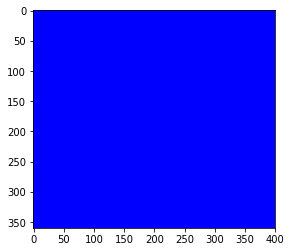

In [2]:
r = 0
g = 0
b = 255

width = 400
height = 360

pixel = np.array([b, g, r], np.uint8)
wGrid = np.array([pixel]*width, np.uint8)
newImg = np.array([wGrid]*height, np.uint8)
img = cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

## 画像の読込み


In [5]:
# 画像の読込み
img = cv2.imread('../datasets/cars/0.jpg')

# BGRからRGBに変換して画像読込み
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

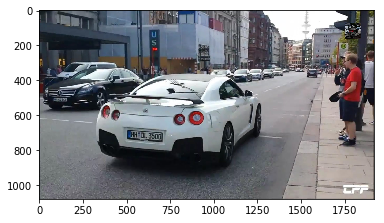

In [6]:
# 画像の表示
plt.imshow(img)
plt.show()

## 画像の色の平均値の算出

In [18]:
# 画像の読込み
img = cv2.imread('../datasets/cars/0.jpg')

# BGRからRGBに変換して画像読込み
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [19]:
average_color_per_row = np.average(img, axis=0)
average_color = np.average(average_color_per_row, axis=0)
average_color = np.uint8(average_color)
average_color_img = np.array([[average_color]*500]*500, np.uint8)

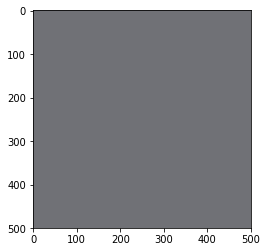

In [20]:
# 画像の表示
plt.imshow(average_color_img)
plt.show()

## 画素をいじる

In [40]:
###
# 画素へのアクセス
###

cols = 640
rows = 480

#イメージ生成
img = cv2.imread('../datasets/cars/0.jpg')

# print image
print(img[0,1])

[22 19 11]


In [41]:
width = img.shape[0]
height = img.shape[1]
amount = 2.0

In [46]:
for x in range(0, width):
    for y in range(0, height):
        pixel = img[x, y]
        b = pixel[0]
        g = pixel[1]
        r = pixel[2]
        change_color
        if x < width/2 and y < height/2:
            color = np.array([b, g, r*amount], np.uint8)
        else:
            color = np.array([b, g, r], np.uint8)
        img[x, y] = color

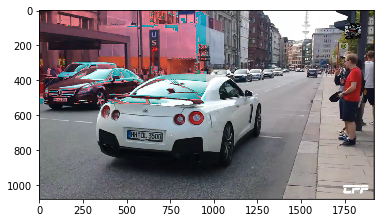

In [47]:
# 画像の表示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### 表示用の関数
面倒だったので作った

In [54]:
def show_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

## トリミング

In [57]:
img = cv2.imread('../datasets/cars/0.jpg')

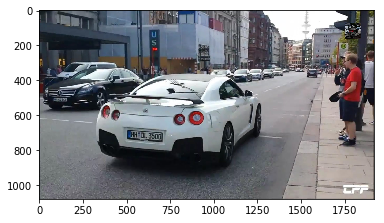

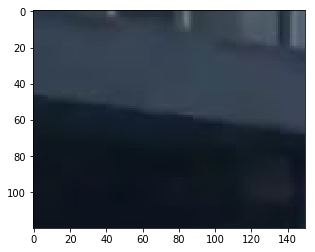

In [58]:
x = 200
y = 100
width = 150
height = 120

dstImg = img[y:y+height, x:x+width]
show_img(img)
show_img(dstImg)

## リサイズ

In [61]:
img = cv2.imread('../datasets/cars/0.jpg')

In [78]:
width = img.shape[0]
height = img.shape[1]
resizeImg = cv2.resize(img, (int(height/4), int(width/4)))

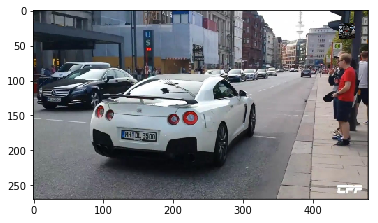

In [79]:
show_img(resizeImg)

## 加算

In [80]:
img = cv2.imread('../datasets/cars/0.jpg')
img2 = cv2.imread('../datasets/cars/2.jpg')

In [87]:
width = 500
height = 500

addImg = np.zeros((height, width, 3), np.uint8)

In [88]:
for x in range(0, width):
    for y in range(0, height):
        addpixel = img[x, y] + img2[x, y]
        addImg[x, y] = addpixel

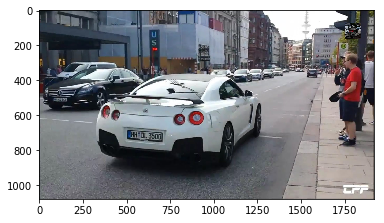

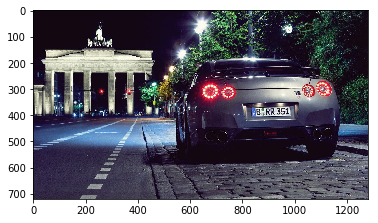

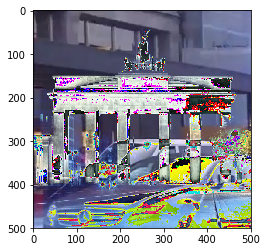

In [89]:
show_img(img)
show_img(img2)
show_img(addImg)

## アフィン変換

In [91]:
img = cv2.imread('../datasets/cars/0.jpg')

width = img.shape[1]
height = img.shape[0]

center = tuple(np.array([width/2, height/2]))
size = tuple(np.array([width, height]))

In [92]:
rad = 45*np.pi/180
movX = 10
movY = 10
matrix = [
    [np.cos(rad), -1*np.sin(rad), movX],
    [np.sin(rad), np.cos(rad), movY],
]
afMat = np.float32(matrix)

In [97]:
angle = 45
scale = 1.0
rotMat = cv2.getRotationMatrix2D(center, angle, scale)

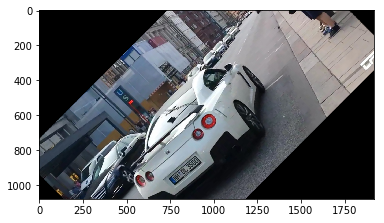

In [98]:
afnImg = cv2.warpAffine(img, rotMat, size, flags=cv2.INTER_CUBIC)
show_img(afnImg)

## 反転

In [99]:
img = cv2.imread('../datasets/cars/0.jpg')

In [116]:
rimg = img.copy()
fimg = img.copy()
rimg = cv2.flip(img, 1)
fimg = cv2.flip(img, 0)

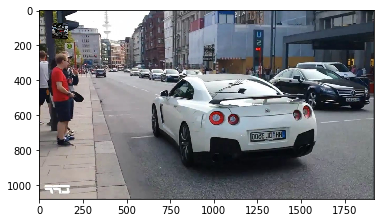

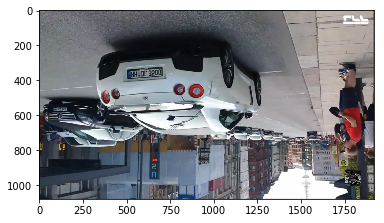

In [117]:
show_img(rimg)
show_img(fimg)

## グレースケール変換

In [129]:
img = cv2.imread('../datasets/cars/0.jpg')

In [130]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

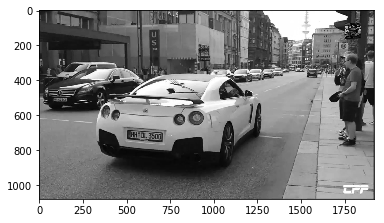

In [131]:
plt.imshow(gray)
plt.gray()
plt.show()

## 描画関数Circle

In [132]:
img = cv2.imread('../datasets/cars/0.jpg')

In [147]:
w = 400
h = 300

plane = np.zeros([300, 500], np.uint8)
center = tuple([int(plane.shape[1]/2), int(plane.shape[0]/2)])
radius = 100
color = tuple([255, 0, 0])
thicness = 2

In [148]:
cv2.circle(plane, center, radius, color, thicness)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

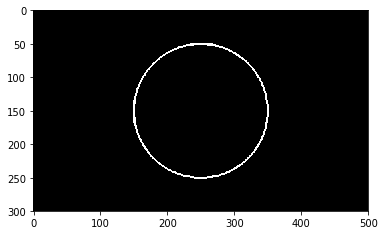

In [149]:
plt.imshow(plane)
plt.show()

## 色の抽出

In [150]:
original = cv2.imread('../datasets/cars/0.jpg')

In [151]:
img = original.copy()
dst = np.zeros(img.shape, np.uint8)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [163]:
colorRange = [245, 255]
thanSaturate = 0
thanValue = 0
for x in range(0, img.shape[1]):
    for y in range(0, img.shape[0]):
        if hsv[y,x][0] >= colorRange[0] and hsv[y,x][0] < colorRange[1] and hsv[y,x][1] > thanSaturate and hsv[y,x][2] > thanValue:
            radius = 1
            color = tuple([255, 0, 0])
            thicness = 1
            cv2.circle(img, tuple([x, y]), radius, color, thicness)
            dst[y, x] = img[y, x]

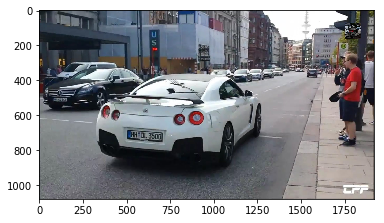

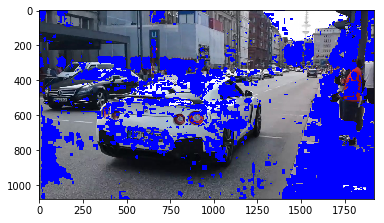

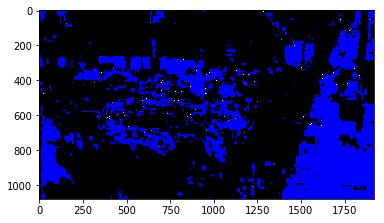

In [164]:
show_img(original)
show_img(img)
show_img(dst)

## カラーチャンネル

In [165]:
img = cv2.imread('../datasets/cars/0.jpg')

In [166]:
bgr = cv2.split(img)

blue = bgr[0]
green = bgr[1]
red = bgr[2]

changeChannel = cv2.merge([green, blue])

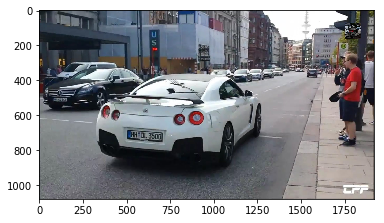

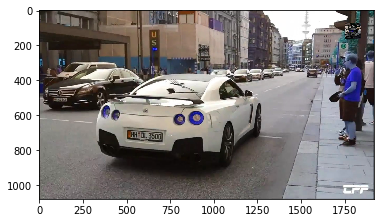

In [168]:
show_img(img)
show_img(changeChannel)